### Loading the required libs

In [16]:
from keras.datasets import reuters
import numpy as np

### Loading the Reuters dataset

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 1us/step


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

### Decoding newswires back to text

In [7]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 1s 1us/step


In [61]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[5]])

In [62]:
decoded_newswire

"? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3"

In [64]:
train_labels[5]

4

## Preparing the data

### Encoding the data

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [17]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

In [29]:
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

In [33]:
## built-in way of doing the one-hot encoding
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [34]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Model definition

In [36]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Compiling the model

In [37]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Validation dataset

In [41]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training the model

In [42]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 153us/step - loss: 2.4912 - acc: 0.4934 - val_loss: 1.6736 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.3836 - acc: 0.7061 - val_loss: 1.2747 - val_acc: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 70us/step - loss: 1.0431 - acc: 0.7722 - val_loss: 1.1158 - val_acc: 0.7650
Epoch 4/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.8208 - acc: 0.8290 - val_loss: 1.0223 - val_acc: 0.7730
Epoch 5/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.6574 - acc: 0.8641 - val_loss: 0.9707 - val_acc: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.5236 - acc: 0.8934 - val_loss: 0.9209 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.4278 - acc: 0.9116 - val_loss: 0.9145 - val_acc: 0.8020
Epoch 

### Plotting the training and validation loss

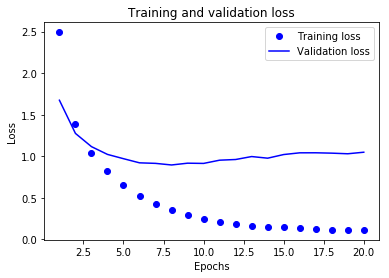

In [44]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy

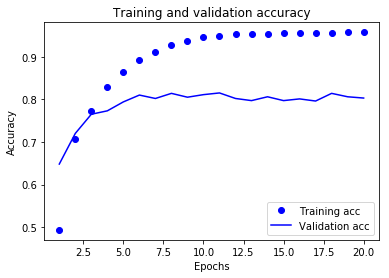

In [47]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Retraining a model from scratch

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 137us/step - loss: 2.5391 - acc: 0.5220 - val_loss: 1.6786 - val_acc: 0.6510
Epoch 2/9
7982/7982 [==============================] - 1s 70us/step - loss: 1.3728 - acc: 0.7129 - val_loss: 1.2785 - val_acc: 0.7180
Epoch 3/9
7982/7982 [==============================] - 1s 71us/step - loss: 1.0163 - acc: 0.7798 - val_loss: 1.1322 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.8012 - acc: 0.8239 - val_loss: 1.0540 - val_acc: 0.7610
Epoch 5/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.6436 - acc: 0.8608 - val_loss: 0.9752 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.5158 - acc: 0.8919 - val_loss: 0.9092 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.4151 - acc: 0.9136 - val_loss: 0.8933 - val_acc: 0.8200
Epoch 8/9
798

In [49]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 84us/step


In [50]:
results

[1.0219353712358754, 0.7764915405695499]

### Generating predictions on new data

In [51]:
predictions = model.predict(x_test)

In [53]:
predictions[0]

array([1.14070117e-05, 8.90730153e-05, 1.81336836e-05, 9.74340141e-01,
       1.48936892e-02, 9.14796701e-08, 8.76145714e-05, 2.97050956e-05,
       3.49971349e-03, 1.98216185e-06, 3.01252403e-05, 1.21913082e-03,
       5.11213148e-05, 2.77526706e-05, 4.02501928e-06, 1.34353231e-05,
       7.91055965e-04, 1.56160517e-04, 2.43918475e-04, 1.11777370e-03,
       7.76823843e-04, 5.30073536e-04, 5.83578458e-06, 5.32443628e-05,
       1.12457237e-05, 2.75740807e-04, 1.87825071e-06, 2.19409831e-05,
       5.88197054e-06, 1.11582245e-04, 3.08908144e-04, 1.75709836e-04,
       1.04490300e-05, 3.95518546e-05, 3.79432095e-05, 1.94826371e-05,
       1.31235749e-04, 5.38080640e-05, 8.12125800e-05, 2.31092243e-04,
       3.01063974e-05, 4.08803986e-04, 1.51394647e-06, 3.23372369e-05,
       6.21841991e-06, 1.08839404e-05], dtype=float32)

In [54]:
np.sum(predictions[0])

0.9999996

In [57]:
test_labels[0]

3

In [55]:
np.argmax(predictions[0])

3

### A model with an information bottleneck

In [56]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 135us/step - loss: 3.1595 - acc: 0.2409 - val_loss: 2.6002 - val_acc: 0.2830
Epoch 2/20
7982/7982 [==============================] - 1s 79us/step - loss: 2.0465 - acc: 0.5496 - val_loss: 1.6999 - val_acc: 0.5860
Epoch 3/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.5013 - acc: 0.6240 - val_loss: 1.5106 - val_acc: 0.6430
Epoch 4/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.2892 - acc: 0.6926 - val_loss: 1.4148 - val_acc: 0.6730
Epoch 5/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.1455 - acc: 0.7155 - val_loss: 1.3635 - val_acc: 0.6850
Epoch 6/20
7982/7982 [==============================] - 1s 78us/step - loss: 1.0391 - acc: 0.7313 - val_loss: 1.3417 - val_acc: 0.6990
Epoch 7/20
7982/7982 [==============================] - 1s 78us/step - loss: 0.9562 - acc: 0.7439 - val_loss: 1.3392 - val_acc: 0.7020
Epoch 